In [64]:
# Import relevant libraries
import os
import sys
sys.path.append("..\..")

import pandas as pd
import matplotlib.pyplot as plt

from scada_data_analysis.modules.power_curve_preprocessing import PowerCurveFiltering

In [65]:
# Load turbine scada data
df = pd.read_csv('wind-farm-1-signals-2016.csv', sep=';')

In [66]:
df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2016-01-08T23:10:00+00:00,1634.3,1226.9,1416.4,96.4,49,62,63,64,...,-998.7,-649.2,-1000.0,18.5,998.7,1000.0,649.2,18.5,40,207.1
1,T06,2016-04-19T12:20:00+00:00,1796.1,1597.0,1680.0,29.8,66,97,107,111,...,-615.2,-583.3,-1000.0,91.9,423.8,783.5,406.1,52.7,57,129.9
2,T01,2016-01-08T23:10:00+00:00,1657.5,1299.2,1495.0,83.8,47,62,62,61,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,49,220.6
3,T11,2016-04-19T12:30:00+00:00,1771.2,1590.0,1677.5,29.4,66,111,110,110,...,-639.6,-583.3,-1000.0,132.4,452.2,1000.0,406.1,125.1,56,123.5
4,T07,2016-01-08T23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46,73,72,71,...,-1000.0,-1000.0,-1000.0,0.0,998.6,1000.0,884.5,11.1,47,206.1


In [67]:
pc_filter = PowerCurveFiltering(
    turbine_label='Turbine_ID',
    windspeed_label='Amb_WindSpeed_Avg',
    power_label='Prod_LatestAvg_TotActPwr',
    data=df,
    cut_in_speed=3,
    bin_interval=0.5,
    z_coeff=2.5,
    filter_cycle=5,
    return_fig=True,
    image_path='images'
)

# cut in speed: when the blades start rotating and generating power
# bin interval: Wind-speed data are arranged into bins or wind-speed intervals, which typically span 0.5 m/s.
# z_coeff: threshold of standard deviation used in filter within which operational data is considered normal
# filter_cycle: number of times to pass scada data through filter
# return_fig: if true, module returns power curve plot in addition to filtered datasets
# image_path: used only if return_fig is True

Wall time: 14.1 s


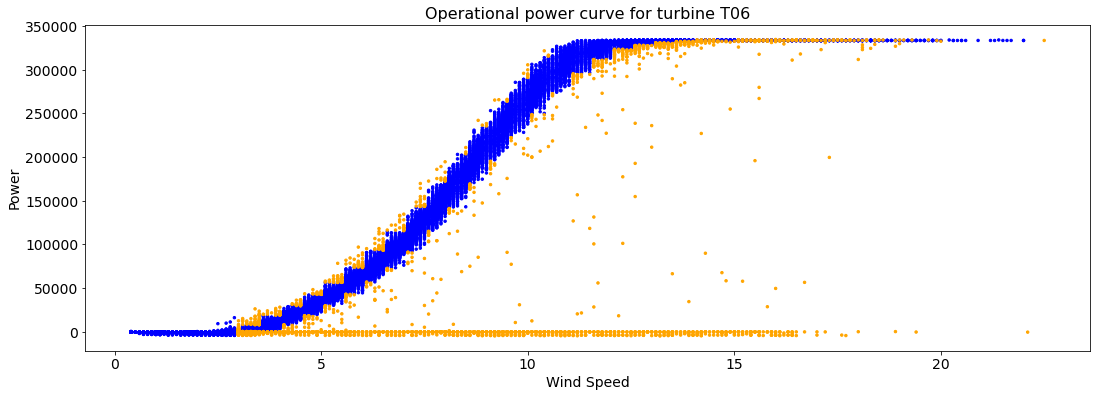

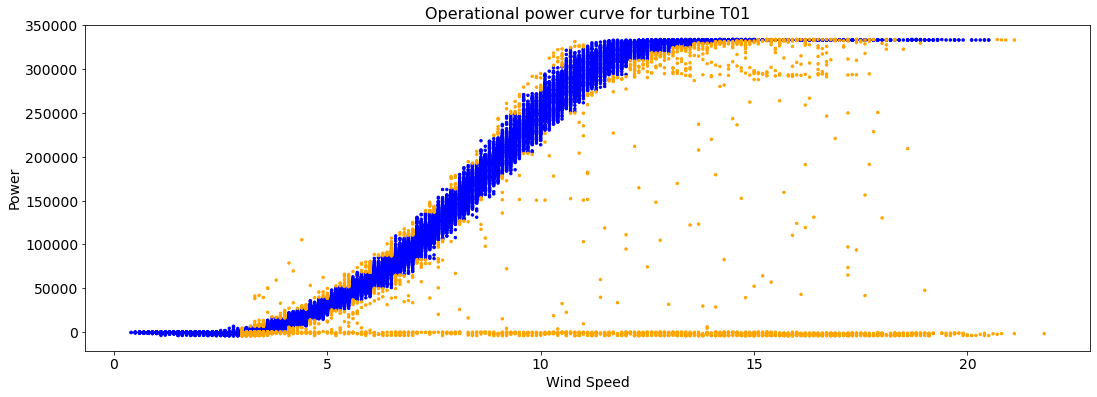

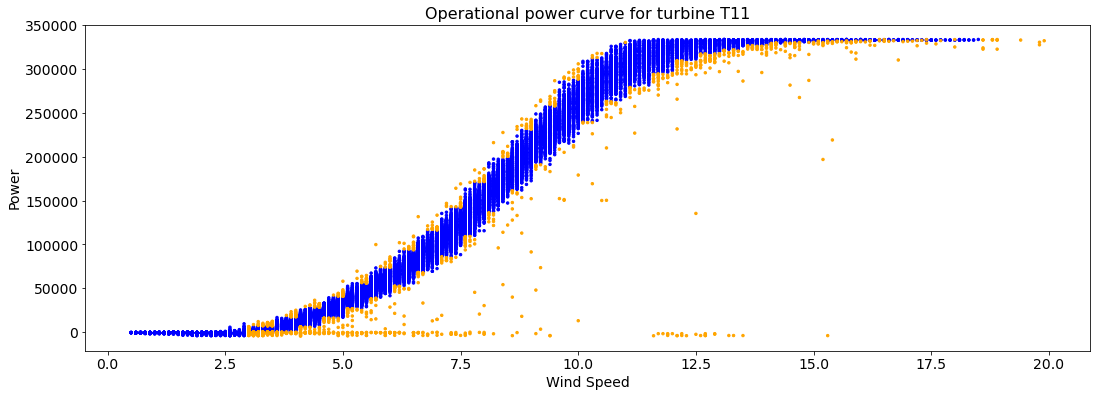

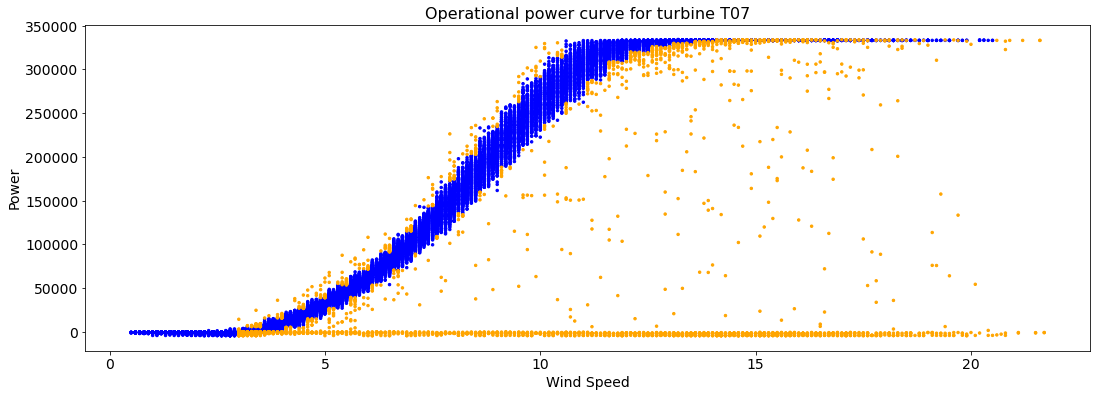

In [68]:
%%time
normal_df, abnormal_df = pc_filter.process()

# blue --> normal data points
# orange --> abnormal data points